# Exploring advertising markets

In this project let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

To that end we can search for existing data about what types of content new coder's are interested in. We could organize these surveys ourselves, but this would be costly so it makes sense to first explore what's available. [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. They also run a popular Medium publication (with over 400,000 followers), a [survey they held in 2017](https://github.com/freeCodeCamp/2017-new-coder-survey) attracted a large number of new coders with varying interests (not only web development), which is great for the purpose of our analysis.

In [1]:
# Basic package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = 150 # Extend column display to avoid truncation
data_raw = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
data_raw.describe()

C:\Users\Devin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,297.0,1977.0,2472.0,446.0,1076.0,133.0,132.0,544.0,547.0,481.0,1753.0,7200.000000,3833.000000,4508.000000,3858.000000,15291.000000,15329.000000,15380.000000,6397.000000,15256.000000,6402.000000,1371.000000,16714.000000,7623.000000,15293.000000,15222.000000,18068.000000,9223.000000,3201.0,1470.0,1940.0,1092.0,4047.0,4831.0,1875.0,1560.0,2677.0,939.0,584.0,1691.0,6503.000000,16577.000000,17084.000000,403.0,1636.0,773.0,728.0,327.0,187.0,726.0,1123.0,1061.0,345.0,333.0,790.0,408.0,318.0,655.0,311.0,9390.0,1848.0,4402.0,4671.0,3243.0,1341.0,13803.0,2049.0,3800.0,2558.0,6417.0,976.0,2392.0,452.0,11207.0,2260.0,3837.0,5120.0,9765.0,3362.000000,956.0,976.0,1397.0,1453.0,1847.0,2619.0,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56169.169306,0.227498,0.572981,0.609383,0.420901,0.252463,0.854811,0.269970,0.075511,0.568416,166541.105033,15.609250,43169.357864,0.238083,0.024241,0.250609,0.434674,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.771644,957.299753,20.790447,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31602.625521,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74811.725422,0.419271,0.494700,0.487952,0.493720,0.434439,0.352302,0.443979,0.264223,0.495336,137761.450348,15.283681,61812.293272,0.425924,0.153802,0.433376,0.495741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419806,5003.003169,41.722826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39383.187732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [3]:
data_raw.sample(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
13981,23.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,Kenya,United States of America,food and beverage,NaN,Employed for wages,NaN,NaN,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,bc79a71adf271c0ac98700e4b4cc07a2,62f30e9b466de19f5d0f32f33b5c58dc,15000.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,Swahili,"single, never married",19.0,1.0,59630da1c3,2017-03-14 03:07:49,2017-03-14 01:52:43,2017-03-14 03:09:49,2017-03-14 03:07:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
18115,37.0,0.0,NaN,NaN,NaN,NaN,1.0,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,I work from home,Croatia,Croatia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,75000.0,9.0,7128115f2e586ad439a6e8a8467e85cc,c81dc13e05e0f63f726e46ea9c1c7e92,12000.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,Croatian,married or domestic partnership,500.0,18.0,68f649cf0f,2017-03-17 20:38:53,2017-03-17 20:35:27,2017-03-17 20:43:12,2017-03-17 20:38:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,"professional degree (MBA, MD, JD, etc.)",Finance,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
15753,24.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N

In [4]:
n_row, n_col = data_raw.shape
print("number of rows: {}, number of columns: {}".format(n_row, n_col))

number of rows: 18175, number of columns: 136


The particular information we're interested in is
1. Which respondents are interested in content that is most similar to our product?
2. What geographical location do these respondants belong to?

A first look at the data tells us that there were over 18000 respondants and 135 columns. Many of the columns aren't relevant to our analysis, but there is a collection of columns of the form `JobInterest{subject}` which indicate the respondant's interest in a number of careers. The related `JobRoleInterest` column also lists a comma-separated list of roles each respondant is interested in. 

These columns are of interest because if a respondant is interested in a career they may be interested in learning more about that field. If this field is one of the subjects our company produces content for they may be a good option to show our advertisements to.

In [5]:
data_raw['JobRoleInterest'].str.strip().str.split('\s*,\s*', expand=True).stack().value_counts().head(30)

Full-Stack Web Developer         4198
Front-End Web Developer          3533
Back-End Web Developer           2772
Mobile Developer                 2304
Data Scientist                   1643
Game Developer                   1628
User Experience Designer         1469
Information Security             1326
Data Engineer                    1248
DevOps / SysAdmin                 927
Product Manager                   814
Quality Assurance Engineer        498
Software Engineer                  11
Software Developer                  6
Software engineer                   4
Artificial Intelligence             4
Desktop Application Developer       3
Machine Learning Engineer           3
Research                            2
programmer                          2
data analyst                        2
Bioinformatics                      2
Web Designer                        2
User Interface Designer             2
Java developer                      2
Business Analyst                    2
Ethical Hack

In [6]:
data_raw['JobInterestFullStack'].value_counts()

1.0    4831
Name: JobInterestFullStack, dtype: int64

Splitting the `JobRoleInterest` column values and tallying the results, we can see that this column lists many more values than are tracked by the various `JobInterest{subject}` columns. While there is significant overlap amongst the most popular values listed in `JobRoleInterest`, the counts don't match exactly. In the end, we could use either the `JobRoleInterest` or a subset of `JobInterest{subject}` columns for our analysis, but for simplicity's sake we'll elect to use the `JobRoleInterest` column.

Because this column can contain an arbitrary number of responses, it can be interesting to look at how many responses are listed.

In [7]:
option_count = data_raw['JobRoleInterest'].dropna().str.strip().str.split('\s*,\s*').apply(lambda row: len(row))
option_count.value_counts(normalize=True).sort_index()

1     0.316505
2     0.108839
3     0.158896
4     0.152174
5     0.120423
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
11    0.001859
12    0.003003
13    0.000286
Name: JobRoleInterest, dtype: float64

Almost 70% of responses have more than a single interested role listed. This sample is still representative because our company offers products for multiple roles and in fact might be better because this data represents the wide variety of respondant interests.

We can convert our frequency table into normalized frequencies to get a better idea of the proportions of each response:

In [8]:
role_freq = data_raw['JobRoleInterest'].str.strip().str.split('\s*,\s*', expand=True).stack().value_counts(normalize=True)
role_freq.head(20)

Full-Stack Web Developer         0.185752
Front-End Web Developer          0.156327
Back-End Web Developer           0.122655
Mobile Developer                 0.101947
Data Scientist                   0.072699
Game Developer                   0.072035
User Experience Designer         0.065000
Information Security             0.058673
Data Engineer                    0.055221
DevOps / SysAdmin                0.041018
Product Manager                  0.036018
Quality Assurance Engineer       0.022035
Software Engineer                0.000487
Software Developer               0.000265
Software engineer                0.000177
Artificial Intelligence          0.000177
Desktop Application Developer    0.000133
Machine Learning Engineer        0.000133
Research                         0.000088
programmer                       0.000088
dtype: float64

In [9]:
roles = ['Full-Stack Web Developer', 'Front-End Web Developer', 'Back-End Web Developer', 'Mobile Developer']
role_freq.loc[roles].sum()

0.5666814159292035

Here we can see that the 57% of responses are either some form of web development (full-stack, front-end, or back-end) or mobile app development. This is encouraging, but we're actually more interested in the proportion of respondants that indicated they are interested in a role we have courses on. Let's look at that next:

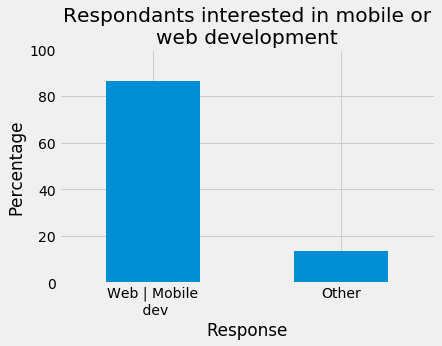

In [10]:
patrn = "Web Developer|Mobile Developer"
percent_interested = data_raw['JobRoleInterest'].dropna().str.strip().str.contains(patrn).value_counts(normalize=True)*100.

plt.style.use('fivethirtyeight')
ax = percent_interested.plot.bar()
ax.set_xticklabels(['Web | Mobile\n dev', 'Other'], rotation=0)
ax.set_title('Respondants interested in mobile or\nweb development')
ax.set_ylabel('Percentage'), ax.set_xlabel('Response')
_ = ax.set_ylim([0, 100.])

Over 80% of respondants indicated that they were interested in either web or mobile development! This indicates that this data is likely to be a good representative for our population of interest since it includes a large number of responses that have indicated they are interested in subjects related to our product.

## Where to advertise?

Now that we're confident this is a good sample to analyze, we need to figure out what geographical markets to show our ads to. Each time we show an ad to someone, there is some chance that they will further look at our products as a result. Let's make a few simplifying assumptions to make our analysis a bit more feasible:
1. Ads can be shown to people who are either interested or disinterested in our service (as expressed by interest in a carrer we have courses for)
2. Ads have a much higher conversion rate for intrested parties than disinterested parties
3. The conversion probability is constant within these two groups (i.e. each person that sees an ad has the same probability of converting)

With these initial simplifications, we can easily determine that our marketing strategy should be to show ads in places with the greatest number of interested parties. However, since we don't have access to survey every possible potential user, we'll use the responses from the survey as a sample for this population. We'll use the `CountryLive` column to determine which are the best countries to list our advertisements in.

In [11]:
df = data_raw[data_raw['JobRoleInterest'].notnull()].copy() # Filter out responses without JobRoleInterest
patrn = "Web Developer|Mobile Developer"
cond = df['JobRoleInterest'].str.strip().str.contains(patrn)
interested = df.loc[cond]

loc_abs_freq = interested['CountryLive'].value_counts()
loc_rel_freq = interested['CountryLive'].value_counts(normalize=True)*100.

pd.DataFrame({'Abs Freq': loc_abs_freq, 
              'Rel Freq': loc_rel_freq}).head(20)

,Abs Freq,Rel Freq
United States of America,2676,45.340563
India,443,7.505930
United Kingdom,281,4.761098
Canada,221,3.744493
Poland,121,2.050152
Brazil,115,1.948492
Germany,107,1.812945
Russia,93,1.575737
Australia,88,1.491020
Ukraine,86,1.457133


This analysis shows that the largest single market is the USA, followed by India, the UK, and Canada. Based on this analysis alone, we would suggest spending our marketing budget in the USA and India.

## Who spends the most on learning?

However, we can dig a bit further. This data contains a column `MoneyForLearning` which describes roughly how much money (in USD) participants spent on learning between the moment they started coding to the time they completed the survey. Since our company is offering a paid subscription service, we want to make sure that we maximize our advertisement in markets where potential users are willing to pay the cost of subscription to learn. To be precise, suppose that our service charges roughly $60 per month, so we want to find the best markets to advertise in that have the most number of potential users willing to pay this month on education.

To save some time and make use of our previous analysis, we'll look at just the top 4 regions from our earlier analysis: the USA, India, the UK, and Canada. Besides being identified as the countries with the greatest populations of potentially interested users, these four regions also all have English as an official language. This could be important to help keep advertising costs low or mitigate the need to translate our product into other languages, which is beyond the scope of this analysis.

One last thing worth mentioning is that our analysis for this bit will assume that the price of our product is set uniform across the world. In reality, the purchasing power of $60/mo varies greatly between countries. A more nuanced approach might be to look for the top two potential revenue streams assuming the monthly price for our product was set around the expected monthly education spending for each location.

In [12]:
df['MonthsProgramming'] = df['MonthsProgramming'].replace(to_replace=0., value=1.) #replace respondants who said they had 0 months exp w. 1 month
df['monthly_spending'] = df['MoneyForLearning']/df['MonthsProgramming']
monthly_spending_nans = df['monthly_spending'].value_counts(dropna=False)[np.nan]

print("NaN values in monthly_spending: {}".format(monthly_spending_nans))

NaN values in monthly_spending: 675


In [13]:
df = df[df['monthly_spending'].notnull()] # Filter out responses missing monthly_spending
df = df[df['CountryLive'].notnull()] # Filter responses missing a country of origin

mo_spending_by_country = df.groupby(by='CountryLive').mean()
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
print(mo_spending_by_country.loc[countries, 'monthly_spending'])

print("***")
med_spending_by_country = df.groupby(by='CountryLive').median()
print(med_spending_by_country.loc[countries, 'monthly_spending'])

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: monthly_spending, dtype: float64
***
CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: monthly_spending, dtype: float64


Looking at the results, we see that apparently the UK spends significantly less than the other top countries on learning per month and the USA spends significantly more each month on monthly learning. However the median spending is much lower for all four countries. This sets off some alarms that we should check for outliers with something like a boxplot.

(Text(0.5, 1.0, 'Money Spent Per Month Per Country'), Text(0.5, 0.98, ''))

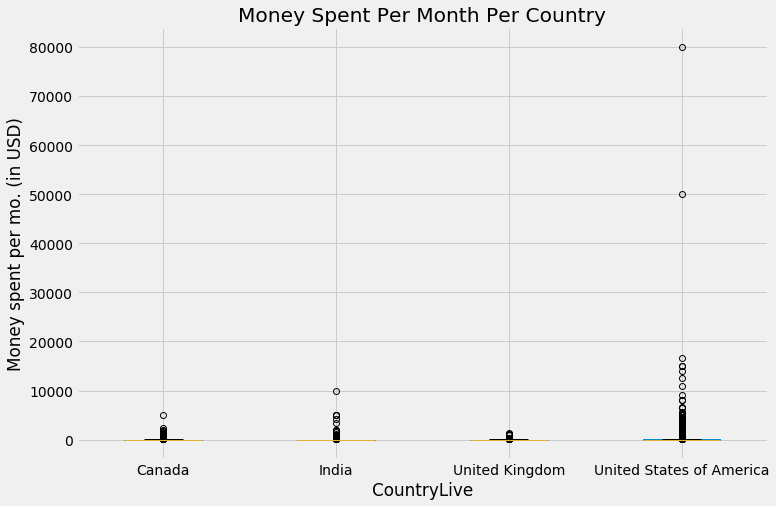

In [14]:
cond = df['CountryLive'].isin(countries)
ax = df[cond].boxplot(column='monthly_spending', by='CountryLive', figsize=(12,8), fontsize=14)
ax.set_ylabel('Money spent per mo. (in USD)')
ax.set_title('Money Spent Per Month Per Country'), plt.suptitle('')

The IQR for each of the relevant countries looks like essentially zero spending per month, but even more significantly we can see several major outliers in the reported monthly spending, particularly in the USA. It's not impossible for these values to be correct (for example a respondant may have interpreted the question to include the money they spent on secondary or post-secondary education or perhaps novice coders that spent a significant amount on a bootcamp), but these values are well beyond the price of our product and strongly skew the reported mean spending so we'll filter them.

In [15]:
mo_spending_limit = 10000. # monthly spending threshold
df = df[df['monthly_spending']<=mo_spending_limit]

In [16]:
# recompute monthly spending
mo_spending_by_country = df.groupby(by='CountryLive').mean()
print(mo_spending_by_country.loc[countries, 'monthly_spending'])

CountryLive
United States of America    155.459187
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: monthly_spending, dtype: float64


(Text(0.5, 1.0, 'Money Spent Per Month Per Country'), Text(0.5, 0.98, ''))

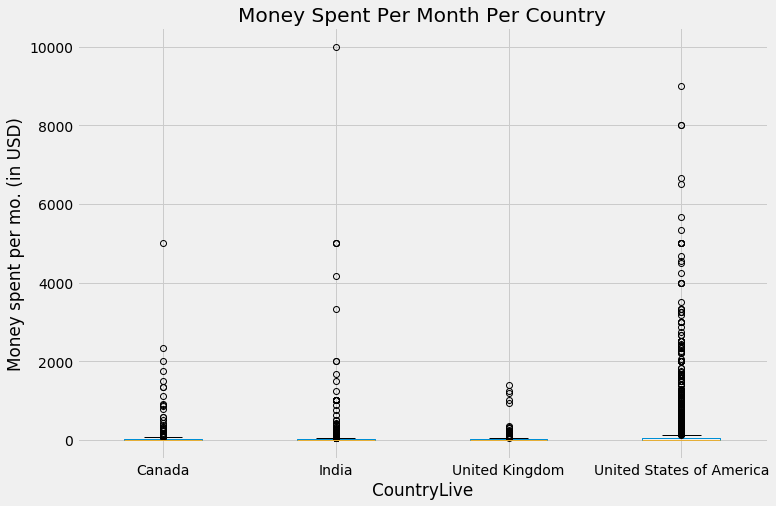

In [17]:
cond = df['CountryLive'].isin(countries)
ax = df[cond].boxplot(column='monthly_spending', by='CountryLive', figsize=(12,8), fontsize=14)
ax.set_ylabel('Money spent per mo. (in USD)')
ax.set_title('Money Spent Per Month Per Country'), plt.suptitle('')

This is looking a bit better, but now we can see a number of still extreme outliers. Although all of the circular marked data points are identified as outliers based on laying outside the IQR, we don't necessarily want to throw away all of this data just because the majority of respondants listed little to no spending.

As a second step, we'll filter out a few more of the extreme outliers with large gaps to even the next closest outlier. For example, the respondant who reportedly spent roughly \\$5000 USD per month, or the respondants in India that claimed to spend more than \\$3000 USD per month.

In [18]:
spending_filter_by_country = {
    'Canada': 5000,
    'India': 3000,
    'United Kingdom': 900,
    'United States of America': 6000
} 

cond = False
for country, limit in spending_filter_by_country.items():
    cond = cond | ((df['CountryLive']==country) & (df['monthly_spending']>=limit))

cond.value_counts()   
df = df.drop(df[cond].index)

(Text(0.5, 1.0, 'Money Spent Per Month Per Country'), Text(0.5, 0.98, ''))

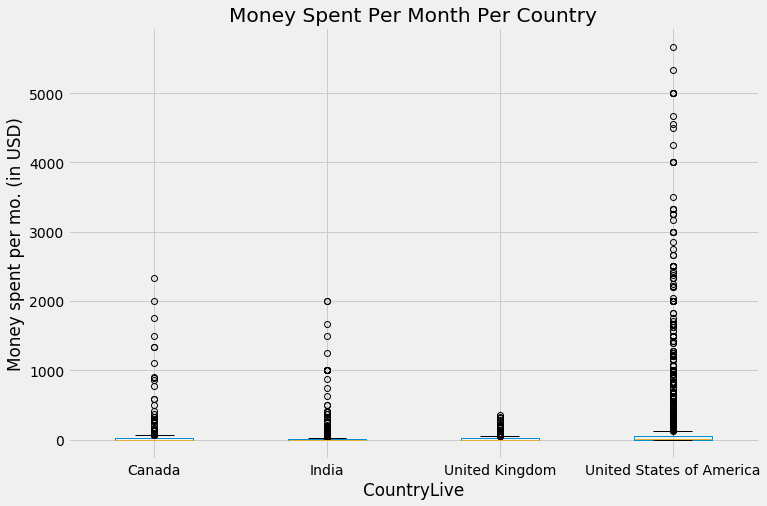

In [19]:
cond = df['CountryLive'].isin(countries)
ax = df[cond].boxplot(column='monthly_spending', by='CountryLive', figsize=(12,8), fontsize=14)
ax.set_ylabel('Money spent per mo. (in USD)')
ax.set_title('Money Spent Per Month Per Country'), plt.suptitle('')

For the last filtering step, we'll automate the process by converting the monthly spending for each country into z-scores and filtering out ones with a score greater than `2.3`. 

In [20]:
def z_score_filter(arr, thresh):
    # returns boolean array for filtering data with a z-score greater than threshold thresh
    mean = arr.mean()
    std = arr.std()
    scores = (arr-mean)/std
    return scores.abs() > thresh

cond = False
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
for country in countries:
    cond = cond | z_score_filter(df.where(df['CountryLive']==country)['monthly_spending'], 3.8)
    
df[cond].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 22 to 18156
Columns: 137 entries, Age to monthly_spending
dtypes: float64(106), object(31)
memory usage: 76.5+ KB


In [21]:
df = df.drop(df[cond].index)

(Text(0.5, 1.0, 'Money Spent Per Month Per Country'), Text(0.5, 0.98, ''))

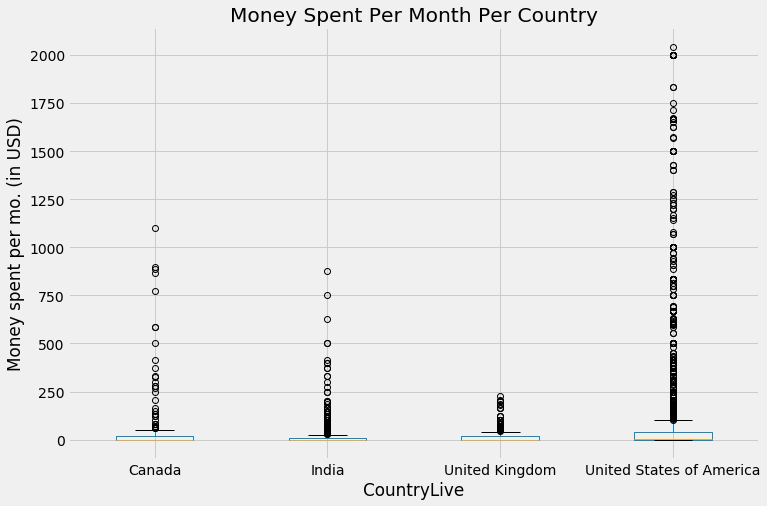

In [22]:
cond = df['CountryLive'].isin(countries)
ax = df[cond].boxplot(column='monthly_spending', by='CountryLive', figsize=(12,8), fontsize=14)
ax.set_ylabel('Money spent per mo. (in USD)')
ax.set_title('Money Spent Per Month Per Country'), plt.suptitle('')

In [23]:
# recompute monthly spending
mo_spending_by_country = df.groupby(by='CountryLive').mean()
print(mo_spending_by_country.loc[countries, 'monthly_spending'])

CountryLive
United States of America    90.202524
India                       30.709658
United Kingdom              20.012925
Canada                      51.454066
Name: monthly_spending, dtype: float64


### Picking our two markets

Even after filtering many of the largest outliers, the USA leads in both spending per month and potential users. However the decision for the next market is a little more interesting. Based on the monthly spending alone, it would appear that Canada is the next best market. However, it's important to keep in mind the number of potential users:

In [25]:
# recompute monthly spending
cond = df['CountryLive'].isin(countries)
print(df.loc[cond, 'CountryLive'].value_counts(normalize=True)*100.)

United States of America    75.229118
India                       11.626080
United Kingdom               7.043729
Canada                       6.101074
Name: CountryLive, dtype: float64


The number of Indian responses is nearly double the Canadian responses. If we assume that the probabilty that our ad might be shown to a potential user is the same between the two countries, this means that we might expect an ad marketed in India to be worth roughly double the number of impressions compared to the same ad shown in Canada. However, by that logic it might still be even better to show ads only in the US just because of how many more responses were from that country. In the end, it would likely be up to marketing on which course of action to take between USA only, US+Canada, and US+India-- but it would likely be prudent to split the marketing alloted to each region to favor ads in the US.